In [311]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [243]:
# Load data
def load_data(train_path, test_path, store_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    store = pd.read_csv(store_path)
    return train, test, store
train, test, store = load_data('../data/train.csv', '../data/test.csv', '../data/store.csv')
train = pd.merge(train, store, on='Store')

C:\Users\akili\AppData\Local\Temp\ipykernel_21916\4180210901.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


In [244]:
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [213]:
train.shape


(1017209, 18)

In [214]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, target_column):
        self.target_column = target_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Q1 = X[self.target_column].quantile(0.25)
        Q3 = X[self.target_column].quantile(0.75)
        IQR = Q3 - Q1
        return X[(X[self.target_column] >= (Q1 - 1.5 * IQR)) & (X[self.target_column] <= (Q3 + 1.5 * IQR))]



In [256]:
def build_data_pipeline():
    numeric_features =train.select_dtypes(include='number').columns
    # Identify numeric and non-numeric columns
    non_numeric_features= train.select_dtypes(exclude='number').columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    non_numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='0')),
    ])
    
    outlier_remover = OutlierRemover(target_column='Sales')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat',  non_numeric_transformer,  non_numeric_features)
        ])
    
    data_pipeline = Pipeline(steps=[
        ('outlier_remover', outlier_remover),
        ('preprocessor', preprocessor)
    ])
    
    return data_pipeline

In [257]:
 #Data Cleaning using pipeline
data_pipeline = build_data_pipeline()
train_cleaned = data_pipeline.fit_transform(train)
print (train_cleaned.shape)

(990515, 25)


In [258]:
print (train_cleaned)

[[-1.7247531229869106 0.4871730508458327 -0.060136028982175654 ...
  0.0011074705355242534 Timestamp('2015-07-31 00:00:00') '']
 [-1.7216561684163483 0.4871730508458327 0.17767801525124066 ...
  0.0011074705355242534 Timestamp('2015-07-31 00:00:00')
  'Jan,Apr,Jul,Oct']
 [-1.718559213845786 0.4871730508458327 0.8456949934349944 ...
  0.0011074705355242534 Timestamp('2015-07-31 00:00:00')
  'Jan,Apr,Jul,Oct']
 ...
 [1.7190603594785 -1.018482968033082 -1.6227019650626626 ...
  0.0011074705355242534 Timestamp('2013-01-01 00:00:00') '']
 [1.7221573140490625 -1.018482968033082 -1.6227019650626626 ...
  0.0011074705355242534 Timestamp('2013-01-01 00:00:00') '']
 [1.7252542686196248 -1.018482968033082 -1.6227019650626626 ...
  0.0011074705355242534 Timestamp('2013-01-01 00:00:00')
  'Mar,Jun,Sept,Dec']]


In [215]:
numeric_features =train.select_dtypes(include='number').columns
    # Identify numeric and non-numeric columns
non_numeric_features= train.select_dtypes(exclude='number').columns

In [216]:
train[numeric_features]

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,0,0,0,0,1,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,0,0,0,0,1,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,0,0,0,0,1,870.0,NaN,NaN,0,NaN,NaN


In [217]:
train[non_numeric_features]

,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,2015-07-31,0,c,a,NaN
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,2015-07-31,0,c,c,NaN
4,2015-07-31,0,a,a,NaN
...,...,...,...,...,...
1017204,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,a,c,c,NaN
1017206,2013-01-01,a,a,c,NaN
1017207,2013-01-01,a,a,c,NaN


In [218]:
num_rows =train.shape[0]
num_cols = train.shape[1]
print("train Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

train Data
Number of Rows: 1017209
Number of Columns: 18



changing non numeric to numeric

In [245]:
train.loc[train['StateHoliday']=='0','StateHoliday']=0
train.loc[train['StateHoliday']=='a','StateHoliday']=1
train.loc[train['StateHoliday']=='b','StateHoliday']=2
train.loc[train['StateHoliday']=='c','StateHoliday']=3
#asorte the value with the same column name
train['StateHoliday']=train['StateHoliday'].astype('int64',copy=False)

In [246]:
train.loc[train['Assortment']=='a','Assortment']=0
train.loc[train['Assortment']=='b','Assortment']=1
train.loc[train['Assortment']=='c','Assortment']=2
train['Assortment']=train['Assortment'].astype('int64',copy=False)

In [247]:
train.loc[train['StoreType']=='a','StoreType']=0
train.loc[train['StoreType']=='b','StoreType']=1
train.loc[train['StoreType']=='c','StoreType']=2
train.loc[train['StoreType']=='d','StoreType']=3
train['StoreType']=train['StoreType'].astype('int64',copy=False)

In [248]:
print(train[['StoreType','Assortment','StateHoliday']].nunique())

StoreType       4
Assortment      3
StateHoliday    4
dtype: int64


In [249]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [251]:
def handle_missing_values(df):
    imputer = SimpleImputer(strategy='median')
    df['CompetitionDistance'] = imputer.fit_transform(df[['CompetitionDistance']]).astype('int64')
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0).astype('int64')
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0).astype('int64')
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype('int64')
    df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype('int64')
    df['PromoInterval'] = df['PromoInterval'].fillna('')
    df['days_to_next_holiday']=df['days_to_next_holiday'].fillna(0).astype('int64')
    df['days_since_last_holiday']=df['days_since_last_holiday'].fillna(0).astype('int64')
    return df

# Apply the function to the training data
train = handle_missing_values(train)

# Display the first few rows of the cleaned training data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,13,2010,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,14,2011,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0


In [250]:
train['Date'] = pd.to_datetime(train['Date'])
train['DayOfWeek'] = pd.to_datetime(train['Date']).dt.dayofweek
# Extract weekdays and weekends
train['Weekday'] = train['DayOfWeek'].apply(lambda x: 1 if x < 5 else 0).astype('int64')
train['is_weekend'] = train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
# Extract beginning, mid, and end of the month
train['is_start_of_month'] = train['Date'].dt.day.apply(lambda x: 1 if x <= 10 else 0)
train['is_mid_of_month'] = train['Date'].dt.day.apply(lambda x: 1 if x > 10 and x <= 20 else 0)
train['is_end_of_month'] = train['Date'].dt.day.apply(lambda x: 1 if x > 20 else 0)
# Calculate the days to the next holiday
train["days_to_next_holiday"] = (train["StateHoliday"].shift(-1) - train["StateHoliday"]) * -1

# Calculate the days since the last holiday
train["days_since_last_holiday"] = (train["StateHoliday"] - train["StateHoliday"].shift(1)) * -1



In [252]:
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,13,2010,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,14,2011,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
5,6,4,2015-07-31,5651,589,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
6,7,4,2015-07-31,15344,1414,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
7,8,4,2015-07-31,8492,833,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
8,9,4,2015-07-31,8565,687,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
9,10,4,2015-07-31,7185,681,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0


In [253]:
# Check for NaN values
print(train.isna().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Weekday                      0
is_weekend                   0
is_start_of_month            0
is_mid_of_month              0
is_end_of_month              0
days_to_next_holiday         0
days_since_last_holiday      0
dtype: int64


In [254]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int32         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [255]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekday', 'is_weekend',
       'is_start_of_month', 'is_mid_of_month', 'is_end_of_month',
       'days_to_next_holiday', 'days_since_last_holiday'],
      dtype='object')

In [233]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,13,2010,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,14,2011,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,0,0,,1,0,0,0,1,0,0
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,0,0,,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,1,1,0,...,31,2013,"Jan,Apr,Jul,Oct",1,0,1,0,0,0,0
1017205,1112,1,2013-01-01,0,0,0,0,1,1,2,...,0,0,,1,0,1,0,0,0,0
1017206,1113,1,2013-01-01,0,0,0,0,1,1,0,...,0,0,,1,0,1,0,0,0,0
1017207,1114,1,2013-01-01,0,0,0,0,1,1,0,...,0,0,,1,0,1,0,0,0,0


In [260]:
columns_to_exclude = ['Date','PromoInterval']
columns_to_scale = [column for column in train.columns if column not in columns_to_exclude]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train[columns_to_scale])
train[columns_to_scale] = scaled_data

In [151]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,-1.731640,0.501484,2015-07-31,-0.132683,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,1.001128,-0.363286,-0.636252,-0.325521
1,-1.728534,0.501484,2015-07-31,0.075373,-0.017540,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,-0.998873,-0.363286,1.571705,-0.325521
2,-1.725427,0.501484,2015-07-31,0.659800,0.404499,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,-0.998873,-0.363286,1.571705,-0.325521
3,-1.722321,0.501484,2015-07-31,2.135414,1.862258,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,1.001128,-0.363286,-0.636252,-0.325521
4,-1.719214,0.501484,2015-07-31,-0.247231,-0.159656,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,1.001128,-0.363286,-0.636252,-0.325521


In [265]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the full pipeline
def build_full_pipeline():
    preprocessor = build_data_pipeline()
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    return pipeline




In [276]:

# Split the data
X = train.drop(columns=['Sales'])
y = train['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
pipeline = build_full_pipeline()
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

KeyError: 'Sales'

In [277]:
# Separate the features and target variable
X = train.drop("Sales", axis=1)
y = train["Sales"]

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer([
    ("num_transformer", StandardScaler(), ["Store", "DayOfWeek", "Customers", "Open", "Promo", "SchoolHoliday"]),
    ("cat_transformer", OneHotEncoder(), ["PromoInterval"])
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# Create the pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

In [279]:

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
# Make predictions and evaluate

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)


RMSE: 0.15473901260171113


In [280]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9760022129191289


2.3 Choose a Loss Function
For this regression problem, the most common and interpretable loss function is Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). RMSE is chosen because it penalizes larger errors more significantly and is easy to interpret.

In [281]:
from sklearn.metrics import mean_squared_error

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# After fitting the model and making predictions
rmse = evaluate_model(y_test, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.15473901260171113


In [286]:
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.9864046332609487


2.4 Post Prediction Analysis

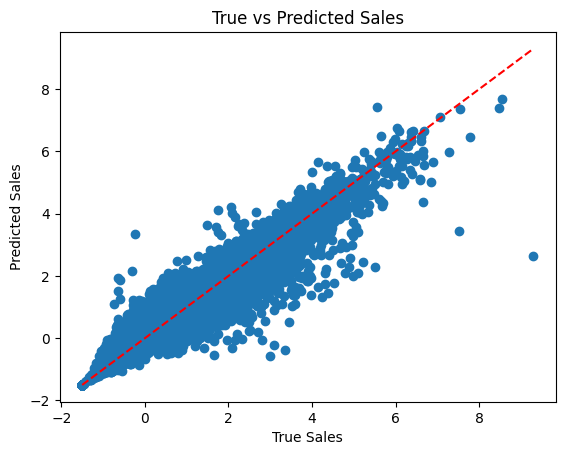

In [287]:
# Plot the predicted sales values against the true sales values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('True vs Predicted Sales')
plt.show()

deep learning

In [288]:
pd.DataFrame(zip(y_test, y_pred),columns=['True', 'Predicted'])

,True,Predicted
0,-1.499723,-1.499723
1,-0.058655,0.101953
2,0.439796,0.600859
3,-0.626978,-0.600701
4,1.465011,0.916260
...,...,...
203437,0.791751,0.740561
203438,1.543454,1.632883
203439,-0.623082,-0.722592
203440,-1.499723,-1.499723


In [290]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday
0,-1.731640,0.501484,2015-07-31,-0.132683,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.760097,-1.001128,,0.630672,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014
1,-1.728534,0.501484,2015-07-31,0.075373,-0.017540,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,0.088250,0.997130,"Jan,Apr,Jul,Oct",0.630672,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014
2,-1.725427,0.501484,2015-07-31,0.659800,0.404499,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,0.153507,0.998124,"Jan,Apr,Jul,Oct",0.630672,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014
3,-1.722321,0.501484,2015-07-31,2.135414,1.862258,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.760097,-1.001128,,0.630672,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014
4,-1.719214,0.501484,2015-07-31,-0.247231,-0.159656,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.760097,-1.001128,,0.630672,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014


In [298]:
train =pd.get_dummies(train,columns=['PromoInterval'])

In [300]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,is_weekend,is_start_of_month,is_mid_of_month,is_end_of_month,days_to_next_holiday,days_since_last_holiday,PromoInterval_,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,-1.731640,0.501484,2015-07-31,-0.132683,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,True,False,False,False
1,-1.728534,0.501484,2015-07-31,0.075373,-0.017540,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,False,False,True,False
2,-1.725427,0.501484,2015-07-31,0.659800,0.404499,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,False,False,True,False
3,-1.722321,0.501484,2015-07-31,2.135414,1.862258,0.452399,1.273237,-0.159217,2.144211,0.580451,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,True,False,False,False
4,-1.719214,0.501484,2015-07-31,-0.247231,-0.159656,0.452399,1.273237,-0.159217,2.144211,-0.884348,...,-0.630672,-0.700515,-0.700517,1.388213,0.000014,0.000014,True,False,False,False


In [304]:
dep_var="Sales"
indep_var=train.columns.drop(['Store','Promo2SinceYear','Date','Sales'])

In [305]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Weekday', 'is_weekend', 'is_start_of_month',
       'is_mid_of_month', 'is_end_of_month', 'days_to_next_holiday',
       'days_since_last_holiday', 'PromoInterval_',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [306]:
u=train[indep_var].values
v=train[dep_var].values

In [307]:
u#create dependent variable data

array([[0.50148416238498, -0.1682687561880313, 0.4523985204043637, ...,
        False, False, False],
       [0.50148416238498, -0.017540363039834146, 0.4523985204043637, ...,
        False, True, False],
       [0.50148416238498, 0.40449913777511787, 0.4523985204043637, ...,
        False, True, False],
       ...,
       [-1.0004759081681662, -1.3633295875773088, -2.210440474266313,
        ..., False, False, False],
       [-1.0004759081681662, -1.3633295875773088, -2.210440474266313,
        ..., False, False, False],
       [-1.0004759081681662, -1.3633295875773088, -2.210440474266313,
        ..., False, False, True]], dtype=object)

In [308]:
v

array([-0.13268286,  0.07537318,  0.65980026, ..., -1.49972273,
       -1.49972273, -1.49972273])

In [309]:
#splitting data set
u_train,u_test,v_train,v_test=train_test_split(u,v,test_size=0.2,random_state=0)
print(u_train.shape)
print(u_test.shape)

(813767, 24)
(203442, 24)


linear rgression

In [310]:
scaler=StandardScaler()

u_train=scaler.fit_transform(u_train)
u_test=scaler.fit_transform(u_test)

In [312]:
linear_rgression=LinearRegression()
linear_rgression.fit(u_train,v_train)

LinearRegression()

In [313]:
v_pred=linear_rgression.predict(u_test)
v_pred

array([-54407753.98068861,  14341222.0653319 ,  14341221.23238512, ...,
        50462813.0974898 , -54605182.43379835, -54605182.95357374])

In [314]:
#calculated the r-squared score of the linear regression model of the training data
# the r- squared score is a stastical measure that represent the proportional of the variance  in the dependencies variable (target) that is prediction 
# it ranges from 0 to 1, where 1 is the indicate a perfect fit of the model to the data
linear_rgression.score(u_train,v_train)

0.8691711943137849

In [316]:
regression_df=pd.DataFrame(zip(v_test,v_pred),columns=['actual','pred'])
regression_df


,actual,pred
0,0.392522,-5.440775e+07
1,0.116153,1.434122e+07
2,0.612527,1.434122e+07
3,3.933111,5.026539e+07
4,-0.078396,1.192118e+08
...,...,...
203437,-0.032161,5.026538e+07
203438,-0.080474,-5.440775e+07
203439,0.108361,5.046281e+07
203440,-0.028785,-5.460518e+07


In [317]:
decisiontree_df=pd.DataFrame(zip(v_test,v_pred),columns=['actual','pred'])
decisiontree_df


,actual,pred
0,0.392522,-5.440775e+07
1,0.116153,1.434122e+07
2,0.612527,1.434122e+07
3,3.933111,5.026539e+07
4,-0.078396,1.192118e+08
...,...,...
203437,-0.032161,5.026538e+07
203438,-0.080474,-5.440775e+07
203439,0.108361,5.046281e+07
203440,-0.028785,-5.460518e+07
